In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
df=pd.read_csv("Downloads\house_sales us.csv")

In [ ]:
df.head()

In [7]:
#checking for null values 
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [ ]:
#data types
df.dtypes

In [ ]:
df.drop(['id'],axis=1,inplace=True)
df.describe()

In [12]:
df.floors.value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: floors, dtype: int64

In [15]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308338,0.525134,0.702044,0.089655,0.256786,0.266331,0.397346,0.036392,0.667463,0.605566,0.323837,0.053982,0.126442,-0.053168,0.306919,0.021571,0.585374,0.082456
bedrooms,0.308338,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.525134,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,-0.203866,0.024573,0.223042,0.568634,0.087175
sqft_living,0.702044,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089655,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256786,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266331,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397346,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036392,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667463,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


In [9]:
df.shape

(21613, 20)

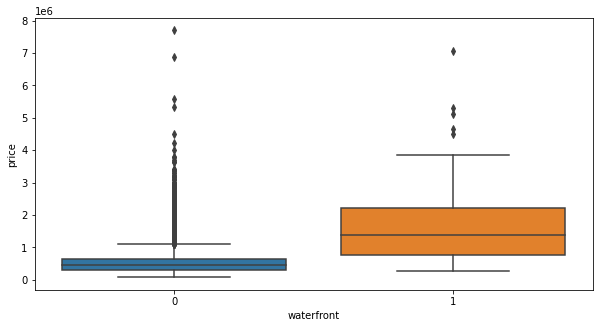

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(x='waterfront',y='price',data=df)


plt.show()

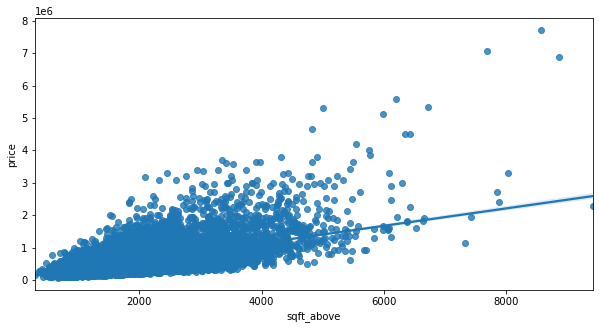

In [27]:
plt.figure(figsize=(10,5))

sns.regplot(x="sqft_above",y="price",data=df)
plt.show()

In [43]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [74]:
x=df[["floors",
"waterfront",
"lat",
"bedrooms",
"sqft_basement",
"view",
"bathrooms",
"sqft_living15",
"sqft_above",
"grade",
"sqft_living"]]
y=df['price']
#fitting the model
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)
yhat=reg.predict(x_train)


In [58]:
train=reg.score(x_train,y_train)
test=reg.score(x_test,y_test)
train

0.6632670474582467

In [59]:
test

0.6440357742887688

In [79]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',linear_model.LinearRegression())]

In [80]:
pipe=Pipeline(input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [82]:
pipe.fit(x,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [83]:
pipe.score(x,y)

0.751336072698173

In [84]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [86]:
ridge=linear_model.Ridge(alpha=1)
ridge.fit(x_train,y_train)

Ridge(alpha=1)

In [87]:
ridge.score(x_train,y_train)

0.6632997975895927

In [88]:
ridge.score(x_test,y_test)

0.6442367210886755

In [92]:
poly=PolynomialFeatures(degree=2)
x_train_pr=poly.fit_transform(x_train)
x_test_pr=poly.fit_transform(x_test)


In [107]:
ridge1=linear_model.Ridge(alpha=0.1)
ridge1.fit(x_train_pr,y_train)

Ridge(alpha=0.1)

In [109]:
y_hat=ridge1.predict(x_train_pr)
print('true_values:',y_test.values)
print('predicted_values:',y_hat)

true_values: [ 297000. 1580000.  562100. ...  380000.  268000.  206000.]
predicted_values: [451048.4952103  450288.11026326 840744.80872791 ... 531449.92568446
 350810.83336779 539311.17083832]


In [110]:
ridge1.score(x_test_pr,y_test)

0.7307450815391472